In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as PP
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline

In [4]:
cereal_data = pd.read_csv('cereals.csv')

In [5]:
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75


In [6]:
def get_dict(groupby_obj):
    keys = []
    val = 1
    x = len(groupby_obj) + 1
    while val < x:
        for key in groupby_obj.groups:
            keys.append((key, val))
            val += 1
    return {el:v for el,v in keys}

In [16]:
mfr = cereal_data.groupby('mfr')
mfr_d = get_dict(mfr)

name = cereal_data.groupby('name')
name_d = get_dict(name)

type_o = cereal_data.groupby('type')
type_d = get_dict(type_o)

In [17]:
adjusted_data = cereal_data.replace({'mfr': mfr_d, 'type': type_d})

In [19]:
adjusted_data.index = adjusted_data.name
adjusted_data = adjusted_data.replace({'name': name_d})
adjusted_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,,,,
100%_Bran,37,7,2,70,4,1,130,10,5,6,280,25,3,1,0.33
100%_Natural_Bran,3,4,2,120,3,5,15,2,8,8,135,0,3,1,1.00
All-Bran,34,2,2,70,4,1,260,9,7,5,320,25,3,1,0.33
All-Bran_with_Extra_Fiber,67,2,2,50,4,0,140,14,8,0,330,25,3,1,0.50
Almond_Delight,27,5,2,110,2,2,200,1,14,8,-1,25,3,1,0.75


In [29]:
adjusted_data.corr()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,1.000000,-0.173214,-0.042275,0.046486,0.103684,-0.160700,-0.032799,0.019100,-0.016219,0.052266,-0.011584,0.173739,0.088307,0.070745,0.139052
mfr,-0.173214,1.000000,-0.319496,-0.262912,0.123440,-0.120398,-0.471303,0.157841,0.053222,-0.357570,0.062888,-0.362727,-0.135872,-0.247272,-0.045378
type,-0.042275,-0.319496,1.000000,0.071596,-0.269265,0.002615,0.321552,0.078114,0.123023,0.285219,0.079825,0.180633,0.131730,0.039880,-0.060057
calories,0.046486,-0.262912,0.071596,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200
protein,0.103684,0.123440,-0.269265,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469
fat,-0.160700,-0.120398,0.002615,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892
sodium,-0.032799,-0.471303,0.321552,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665
fiber,0.019100,0.157841,0.078114,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061
carbo,-0.016219,0.053222,0.123023,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932
sugars,0.052266,-0.357570,0.285219,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358


In [75]:
clean_data = PP.scale(adjusted_data)
clean_data


array([-0.22496064, -0.43732374,  0.20134682, -1.90539669,  1.33731939,
       -0.01298811,  1.20457813,  2.89211291, -1.78716997, -0.43526023,
        3.16174096, -0.14627013,  0.9578133 , -0.19806746, -2.12387042])

In [79]:
pca = PCA(n_components=None)
pca.fit(clean_data)
reduced_data = pca.transform(clean_data)


In [80]:
reduced_data.shape


(77, 15)

In [88]:
kmeans = KMeans(6)
y_pred = kmeans.fit_predict(reduced_data)

In [89]:
y_pred

array([5, 4, 5, 5, 4, 1, 1, 2, 4, 4, 1, 3, 1, 4, 1, 3, 3, 1, 1, 4, 0, 3, 4,
       4, 1, 1, 4, 2, 2, 1, 1, 1, 4, 4, 4, 1, 1, 1, 3, 2, 3, 4, 1, 0, 2, 2,
       2, 1, 1, 2, 3, 2, 2, 3, 0, 0, 4, 0, 2, 4, 4, 3, 3, 0, 0, 0, 1, 3, 0,
       3, 2, 3, 3, 1, 4, 3, 1], dtype=int32)

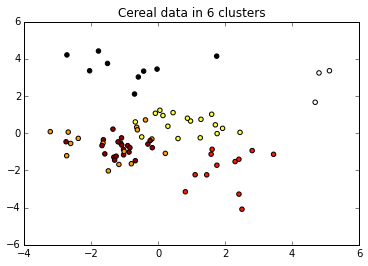

In [91]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal data in 6 clusters")
plt.show()